In [1]:
# Amsterdam Housing Price Analysis: By Kuntala & Nafisa

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading of the data file

In [3]:
df1=pd.read_csv("HousingPrices-Amsterdam-August-2021.csv",index_col="Unnamed: 0")

## Data shape and structure

In [4]:
df1.shape

(924, 7)

In [5]:
df1.columns

Index(['Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')

In [6]:
df1.head()

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


# Data Cleaning

## Handle missing values

In [7]:
df1.isnull().sum()

Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [8]:
df2=df1.dropna() 
df2.isnull().sum() # to check after dropping missing

Address    0
Zip        0
Price      0
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [9]:
df2.shape

(920, 7)

## Handle duplicates

In [10]:
df2[df2.duplicated()]

,Address,Zip,Price,Area,Room,Lon,Lat
910,"Quashibastraat, Amsterdam",1087 VS,348738.0,79,4,5.016555,52.350513


In [11]:
df2.drop_duplicates(inplace=True)

print(df2.duplicated().sum())  #to check after dropping duplicates 

0


<ipython-input-11-d64a6c83583c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


In [12]:
df2.shape

(919, 7)

In [13]:
df2['Address'].head()

1              Blasiusstraat 8 2, Amsterdam
2    Kromme Leimuidenstraat 13 H, Amsterdam
3                Zaaiersweg 11 A, Amsterdam
4              Tenerifestraat 40, Amsterdam
5                Winterjanpad 21, Amsterdam
Name: Address, dtype: object

## Removing the repitition of the word 'Amsterdam' from entire 'Address' column.

In [14]:
df3=df2.copy()
df3['Address']=df2['Address'].apply(lambda x: x.split(',')[0])
df3['Address'].head()

1              Blasiusstraat 8 2
2    Kromme Leimuidenstraat 13 H
3                Zaaiersweg 11 A
4              Tenerifestraat 40
5                Winterjanpad 21
Name: Address, dtype: object

## Extracting the numeric part of Zip code (can be useful for plotting)

In [15]:
df3['Zip_number']=df2['Zip'].apply(lambda x: x.split(' ')[0])
df3['Zip_number'].unique()

array(['1091', '1059', '1097', '1060', '1036', '1051', '1033', '1053',
       '1058', '1073', '1019', '1017', '1064', '1102', '1013', '1016',
       '1072', '1062', '1095', '1034', '1035', '1083', '1056', '1065',
       '1078', '1076', '1054', '1018', '1106', '1093', '1104', '1024',
       '1068', '1075', '1011', '1055', '1094', '1107', '1067', '1025',
       '1052', '1057', '1015', '1061', '1012', '1077', '1098', '1063',
       '1092', '1103', '1021', '1069', '1096', '1066', '1082', '1087',
       '1081', '1027', '1071', '1108', '1032', '1028', '1086', '1014',
       '1031', '1023', '1074', '1022', '1079', '1109'], dtype=object)

## 'Area' column has few values which are given as range instead of a number. We can take the average of the min and max of the range.

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[~df3['Area'].apply(is_float)].head(10)

,Address,Zip,Price,Area,Room,Lon,Lat,Zip_number
25,Bramzeilhof 56,1034 LH,350000.0,100-120,5,4.921574,52.408269,1034
199,Singel 463 F.,1012 WP,1450000.0,120-130,2,4.891701,52.367182,1012
208,Geldersekade 52 A,1012 BJ,729000.0,100-120,5,4.901320,52.375059,1012
217,Ouderkerkerdijk 42,1096 CR,685000.0,100-120,4,4.901539,52.333097,1096
252,Gerda Brautigamstraat 37,1067 VM,545000.0,100-120,4,4.789083,52.379219,1067
279,Insulindeweg 116,1094 PT,850000.0,100-120,2,4.936223,52.360906,1094
603,Edmond Halleylaan 25,1086 ZV,600000.0,100-120,4,4.981387,52.360243,1086
707,Rijsbesstraat 2,1036 LN,650000.0,120-130,5,4.901879,52.406292,1036
732,Saxenburgerstraat 1 B,1054 KM,1025000.0,120-130,3,4.860922,52.358834,1054
734,Nachtwachtlaan 501,1058 ES,550000.0,120-130,5,4.843510,52.363743,1058


In [18]:
def range_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
df4=df3.copy()
df4.Area = df3.Area.apply(range_to_num)
df4.head()

,Address,Zip,Price,Area,Room,Lon,Lat,Zip_number
1,Blasiusstraat 8 2,1091 CR,685000.0,64.0,3,4.907736,52.356157,1091
2,Kromme Leimuidenstraat 13 H,1059 EL,475000.0,60.0,3,4.850476,52.348586,1059
3,Zaaiersweg 11 A,1097 SM,850000.0,109.0,4,4.944774,52.343782,1097
4,Tenerifestraat 40,1060 TH,580000.0,128.0,6,4.789928,52.343712,1060
5,Winterjanpad 21,1036 KN,720000.0,138.0,5,4.902503,52.410538,1036


In [20]:
# To check if the range is converted to number

In [21]:
df4.loc[279]

Address       Insulindeweg 116
Zip                    1094 PT
Price                   850000
Area                       110
Room                         2
Lon                    4.93622
Lat                    52.3609
Zip_number                1094
Name: 279, dtype: object

In [22]:
#Area = 110 i.e average of the range 100-120

In [23]:
(100+120)/2

110.0

## Calculating a new column Price per unit area (EUR / sq metre) 

In [24]:
df5=df4.copy()

In [25]:
df5['Price_per_sqm'] = df5['Price']/df5['Area']
df5.head()

,Address,Zip,Price,Area,Room,Lon,Lat,Zip_number,Price_per_sqm
1,Blasiusstraat 8 2,1091 CR,685000.0,64.0,3,4.907736,52.356157,1091,10703.125000
2,Kromme Leimuidenstraat 13 H,1059 EL,475000.0,60.0,3,4.850476,52.348586,1059,7916.666667
3,Zaaiersweg 11 A,1097 SM,850000.0,109.0,4,4.944774,52.343782,1097,7798.165138
4,Tenerifestraat 40,1060 TH,580000.0,128.0,6,4.789928,52.343712,1060,4531.250000
5,Winterjanpad 21,1036 KN,720000.0,138.0,5,4.902503,52.410538,1036,5217.391304


In [26]:
df5['Price_per_sqm'].describe()

count      919.000000
mean      6482.099793
std       2219.425824
min       2430.555556
25%       4658.914729
50%       6578.947368
75%       7771.867612
max      25252.808989
Name: Price_per_sqm, dtype: float64

# Data Analysis and Visualization

In [27]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 1 to 924
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        919 non-null    object 
 1   Zip            919 non-null    object 
 2   Price          919 non-null    float64
 3   Area           919 non-null    float64
 4   Room           919 non-null    int64  
 5   Lon            919 non-null    float64
 6   Lat            919 non-null    float64
 7   Zip_number     919 non-null    object 
 8   Price_per_sqm  919 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 111.8+ KB


## Distance From City Center : Geolocation

We Choose the Amsterdam Central Station (lat 52.378901,lon 4.9005805) as Amsterdam city center. 

source : https://nominatim.openstreetmap.org/ui/details.html?osmtype=N&osmid=4290854847&class=railway

We will use this to calculate the distance of every house in the dataset from Amsterdam city centre.

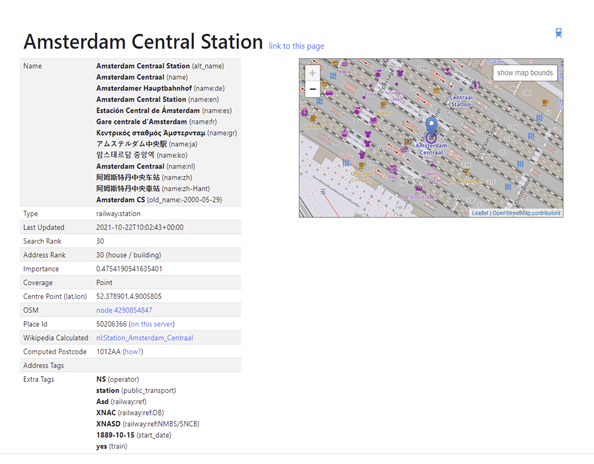

In [28]:
df6 = df5.copy()
df6.head()

,Address,Zip,Price,Area,Room,Lon,Lat,Zip_number,Price_per_sqm
1,Blasiusstraat 8 2,1091 CR,685000.0,64.0,3,4.907736,52.356157,1091,10703.125000
2,Kromme Leimuidenstraat 13 H,1059 EL,475000.0,60.0,3,4.850476,52.348586,1059,7916.666667
3,Zaaiersweg 11 A,1097 SM,850000.0,109.0,4,4.944774,52.343782,1097,7798.165138
4,Tenerifestraat 40,1060 TH,580000.0,128.0,6,4.789928,52.343712,1060,4531.250000
5,Winterjanpad 21,1036 KN,720000.0,138.0,5,4.902503,52.410538,1036,5217.391304


In [29]:
# the haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes

def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)

# Amsterdam Central station (lat 52.378901,lon 4.9005805)
Start_lat = 52.378901  
Start_lon = 4.9005805

# Reference of this code
# https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4
# https://en.wikipedia.org/wiki/Haversine_formula

In [30]:
distances_km = []
for row in df6.itertuples(index=False):
    distances_km.append(haversine_distance(Start_lat, Start_lon, row.Lat, row.Lon))
    
df6['Dist From Amsterdam Central (km)'] = distances_km

In [31]:
df6.head()

,Address,Zip,Price,Area,Room,Lon,Lat,Zip_number,Price_per_sqm,Dist From Amsterdam Central (km)
1,Blasiusstraat 8 2,1091 CR,685000.0,64.0,3,4.907736,52.356157,1091,10703.125000,2.58
2,Kromme Leimuidenstraat 13 H,1059 EL,475000.0,60.0,3,4.850476,52.348586,1059,7916.666667,4.79
3,Zaaiersweg 11 A,1097 SM,850000.0,109.0,4,4.944774,52.343782,1097,7798.165138,4.92
4,Tenerifestraat 40,1060 TH,580000.0,128.0,6,4.789928,52.343712,1060,4531.250000,8.47
5,Winterjanpad 21,1036 KN,720000.0,138.0,5,4.902503,52.410538,1036,5217.391304,3.52


In [32]:
df6.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            915, 916, 917, 918, 919, 920, 921, 922, 923, 924],
           dtype='int64', length=919)

In [33]:
df7 = df6.sort_values('Dist From Amsterdam Central (km)')
df7

,Address,Zip,Price,Area,Room,Lon,Lat,Zip_number,Price_per_sqm,Dist From Amsterdam Central (km)
871,Warmoesstraat 16 M,1012 JD,785000.0,112.0,3,4.899032,52.376065,1012,7008.928571,0.33
878,Geldersekade 11 II,1011 EH,512000.0,64.0,2,4.902531,52.375720,1011,8000.000000,0.38
908,Geldersekade 37 II,1011 EJ,695000.0,96.0,3,4.902359,52.375360,1011,7239.583333,0.41
208,Geldersekade 52 A,1012 BJ,729000.0,110.0,5,4.901320,52.375059,1012,6627.272727,0.43
225,Droogbak 5 B,1013 GE,595000.0,78.0,3,4.893924,52.379828,1013,7628.205128,0.46
...,...,...,...,...,...,...,...,...,...,...
376,Wethouder Ramstraat 11,1107 CM,375000.0,98.0,5,4.990488,52.292974,1107,3826.530612,11.34
801,Lange Stammerdijk 1 G,1109 BK,549001.0,107.0,4,5.016522,52.305075,1109,5130.850467,11.38
78,Wethouder Wierdelsstraat 6,1107 DK,395000.0,101.0,5,4.993551,52.292948,1107,3910.891089,11.46
628,Ter Haarstraat 21 E,1053 LH,875000.0,108.0,4,4.655161,52.376552,1053,8101.851852,16.66


In [34]:
df7.reset_index(drop = True)

,Address,Zip,Price,Area,Room,Lon,Lat,Zip_number,Price_per_sqm,Dist From Amsterdam Central (km)
0,Warmoesstraat 16 M,1012 JD,785000.0,112.0,3,4.899032,52.376065,1012,7008.928571,0.33
1,Geldersekade 11 II,1011 EH,512000.0,64.0,2,4.902531,52.375720,1011,8000.000000,0.38
2,Geldersekade 37 II,1011 EJ,695000.0,96.0,3,4.902359,52.375360,1011,7239.583333,0.41
3,Geldersekade 52 A,1012 BJ,729000.0,110.0,5,4.901320,52.375059,1012,6627.272727,0.43
4,Droogbak 5 B,1013 GE,595000.0,78.0,3,4.893924,52.379828,1013,7628.205128,0.46
...,...,...,...,...,...,...,...,...,...,...
914,Wethouder Ramstraat 11,1107 CM,375000.0,98.0,5,4.990488,52.292974,1107,3826.530612,11.34
915,Lange Stammerdijk 1 G,1109 BK,549001.0,107.0,4,5.016522,52.305075,1109,5130.850467,11.38
916,Wethouder Wierdelsstraat 6,1107 DK,395000.0,101.0,5,4.993551,52.292948,1107,3910.891089,11.46
917,Ter Haarstraat 21 E,1053 LH,875000.0,108.0,4,4.655161,52.376552,1053,8101.851852,16.66


## Price Vs Distance from City Center

Text(0.5, 1.02, 'Price Vs Distance from City Center (KMs)')

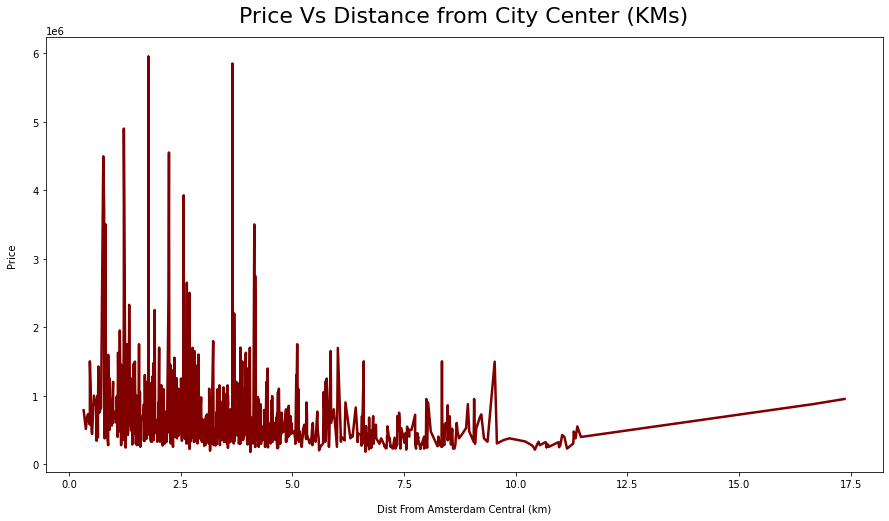

In [35]:
df7.set_index('Dist From Amsterdam Central (km)')['Price'].plot(figsize=(15, 8), linewidth=2.5, color='maroon')
plt.xlabel("Dist From Amsterdam Central (km)", labelpad=15)
plt.ylabel("Price", labelpad=15)
plt.title("Price Vs Distance from City Center (KMs)", y=1.02, fontsize=22)

Area which are closed to Amsterdam's central areas is particularly expensive.

## Price/Sqm Vs Distance from City Center

Text(0.5, 1.02, 'Price/Sqm Vs Distance from City Center (KMs)')

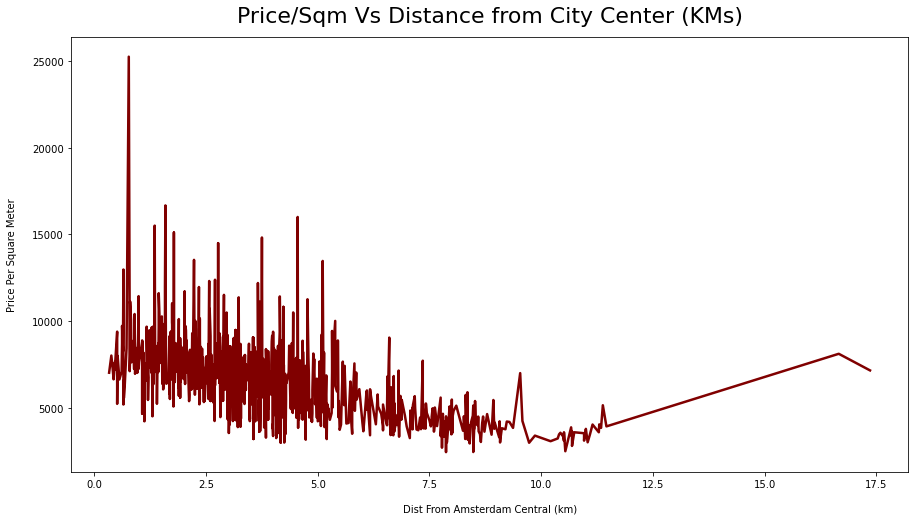

In [36]:
df7.set_index('Dist From Amsterdam Central (km)')['Price_per_sqm'].plot(figsize=(15, 8), linewidth=2.5, color='maroon')
plt.xlabel("Dist From Amsterdam Central (km)", labelpad=15)
plt.ylabel("Price Per Square Meter", labelpad=15)
plt.title("Price/Sqm Vs Distance from City Center (KMs)", y=1.02, fontsize=22)

## House Location Visualization using Map

In [37]:
import folium
map = folium.Map(location=[52.368901, 4.9005805], zoom_start=13)

# For all the houses 
for index, row in df7.iterrows():
    folium.Marker(
    location=[row['Lat'], row['Lon']]
).add_to(map)
    
# For the city center
folium.Marker(
    location=[52.378901, 4.9005805],
    popup='City Center',
    icon=folium.Icon(color="red"),
    tooltip = "Click for more"
).add_to(map)
map

## Analysis based on number of rooms

In [38]:
df7.groupby(['Room']).Address.count().sort_values(ascending = False)

Room
3     330
4     200
2     191
5      97
6      42
7      19
1      17
8      11
9       6
14      2
13      2
10      2
Name: Address, dtype: int64

In [39]:
df7.groupby(['Room']).Price.agg(['mean', 'min', 'max'])

,mean,min,max
Room,,,
1,3.945294e+05,175000.0,950000.0
2,3.834791e+05,179000.0,1450000.0
3,5.124164e+05,225000.0,2475000.0
4,6.111506e+05,260000.0,3680000.0
5,8.450764e+05,265000.0,4495000.0
6,9.199286e+05,350000.0,2500000.0
7,1.394737e+06,600000.0,3925000.0
8,1.751636e+06,700000.0,3500000.0
9,1.450000e+06,900000.0,1775000.0


In [40]:
df7.groupby(['Room']).Price_per_sqm.agg(['mean', 'min', 'max'])

,mean,min,max
Room,,,
1,7844.188322,3484.496124,11956.521739
2,7252.434729,3409.090909,16000.000000
3,6444.175147,2976.190476,16666.666667
4,5781.493228,2783.018868,13524.590164
5,6214.480878,2431.192661,25252.808989
6,5984.665348,2430.555556,15500.000000
7,6683.847610,4109.589041,12304.075235
8,6897.005908,3473.913043,10057.471264
9,7300.009220,5660.377358,10028.248588


## Analysis based on Zip code (numeric part of the Zip)

In [41]:
df7.groupby(['Zip_number']).Price.agg(['mean', 'min', 'max'])

,mean,min,max
Zip_number,,,
1011,7.453750e+05,389000.0,1500000.0
1012,1.093533e+06,340000.0,4495000.0
1013,5.758696e+05,275000.0,1950000.0
1014,9.630000e+05,475000.0,1450000.0
1015,9.377727e+05,250000.0,3500000.0
...,...,...,...
1104,3.500098e+05,250000.0,600000.0
1106,3.089000e+05,209000.0,395000.0
1107,2.996667e+05,225000.0,425000.0


In [42]:
df7.groupby(['Zip_number']).Address.count().sort_values(ascending = False)

Zip_number
1017    31
1055    29
1068    26
1053    26
1058    25
        ..
1096     4
1108     3
1028     2
1109     2
1022     1
Name: Address, Length: 70, dtype: int64

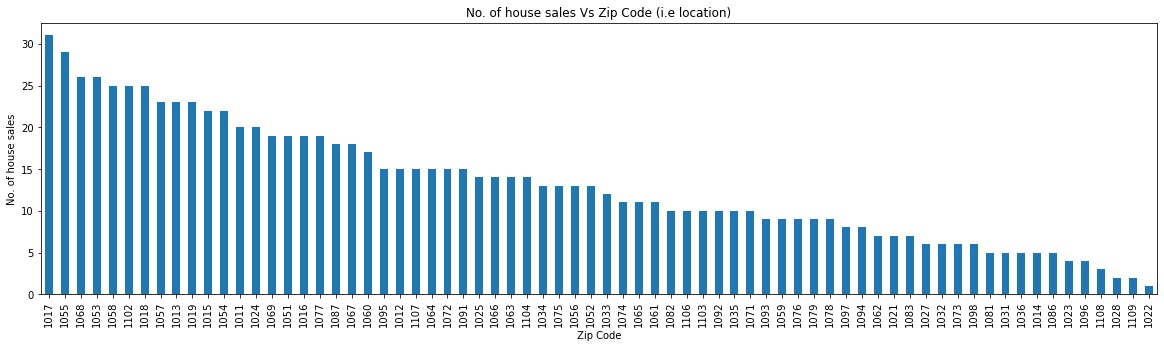

In [56]:
# Number of house sales Vs Zip Code (i.e location)
df7.groupby(['Zip_number']).Address.count().sort_values(ascending = False).plot(figsize=(20, 5),kind="bar")
plt.xlabel("Zip Code")
plt.ylabel("No. of house sales")
plt.title("No. of house sales Vs Zip Code (i.e location)")
# plt.legend()
plt.show()

Maximum house sales are at 1017 zip code.

In [44]:
df7['Dist From Amsterdam Central (km)'].describe()

count    919.000000
mean       4.183841
std        2.502923
min        0.330000
25%        2.395000
50%        3.560000
75%        5.450000
max       17.360000
Name: Dist From Amsterdam Central (km), dtype: float64

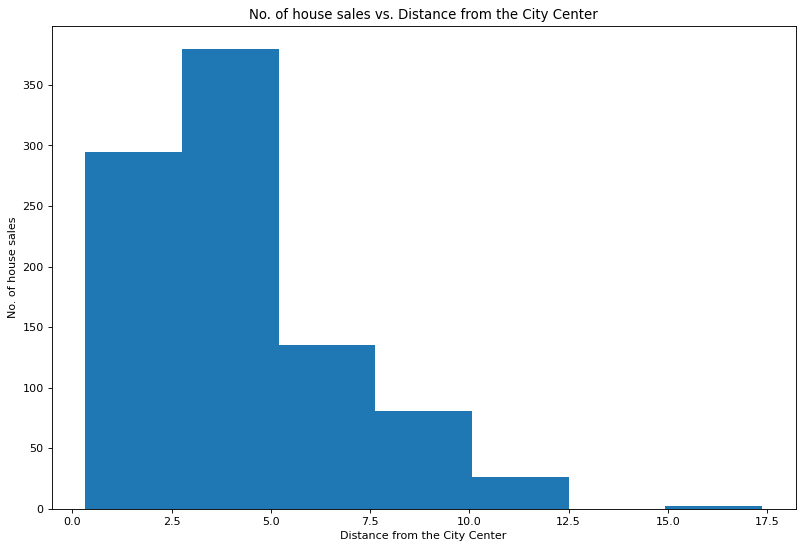

In [55]:
## Number of house sales Vs Distance from the City Center
plt.figure(figsize=(12, 8), dpi=80)
df7['Dist From Amsterdam Central (km)'].plot(kind="hist",bins=7);
plt.xlabel("Distance from the City Center")
plt.ylabel("No. of house sales")
plt.title("No. of house sales vs. Distance from the City Center")
# plt.legend()
plt.show()

Most of the houses sold are within 5kms of the city center.

## Area vs. Price

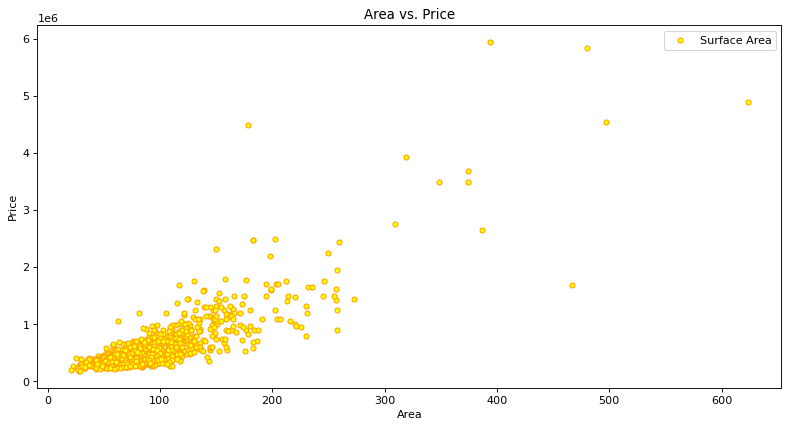

In [46]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(df7['Area'],df7['Price'], s=20, edgecolor="orange", c="yellow", label="Surface Area")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs. Price")
plt.legend()
plt.show()

Bigger the house , higher the price.There is a clear upwards sloping trend relationship between the surface area of the house and the price of the house.

## Area vs. Price/Sqm

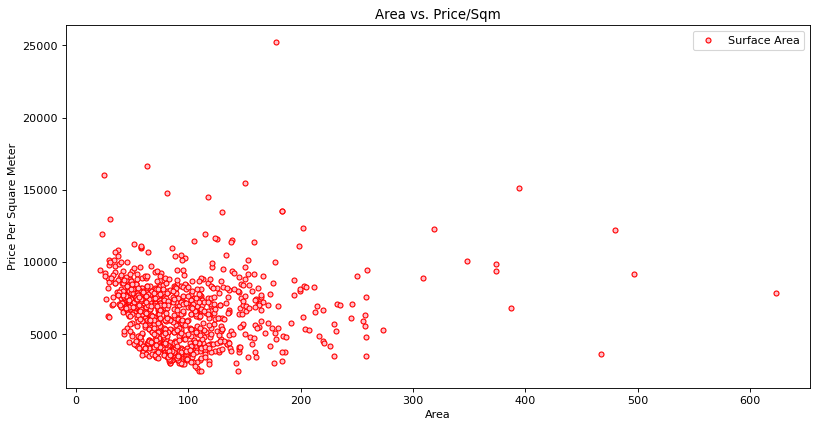

In [47]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(df7['Area'],df7['Price_per_sqm'], s=20, edgecolor="red", c="pink", label="Surface Area")
plt.xlabel("Area")
plt.ylabel("Price Per Square Meter")
plt.title("Area vs. Price/Sqm")
plt.legend()
plt.show()

Interesting observation here is as the house gets bigger, the marginal price of an additional square meter decreases.

## Room vs. Price

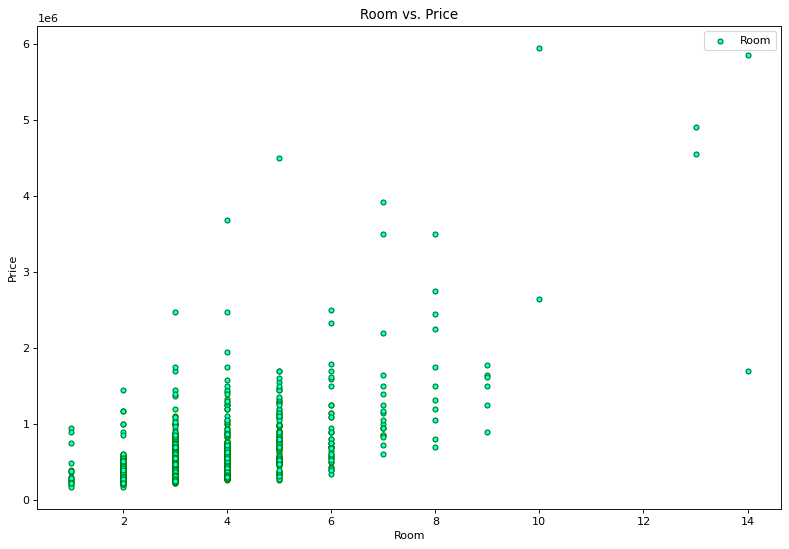

In [48]:
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(df7['Room'],df7['Price'], s=20, edgecolor="green", c="cyan", label="Room")
plt.xlabel("Room")
plt.ylabel("Price")
plt.title("Room vs. Price")
plt.legend()
plt.show()

The more the number of rooms are in a house, higher the price should be? Well, that is not what the graph shows as there are 7-rooms houses going for as little as 600000 EUR and as high as 3925000 EUR.

## Which price range has highest and lowest sales?

Text(0.5, 1.0, 'Price vs. Sale')

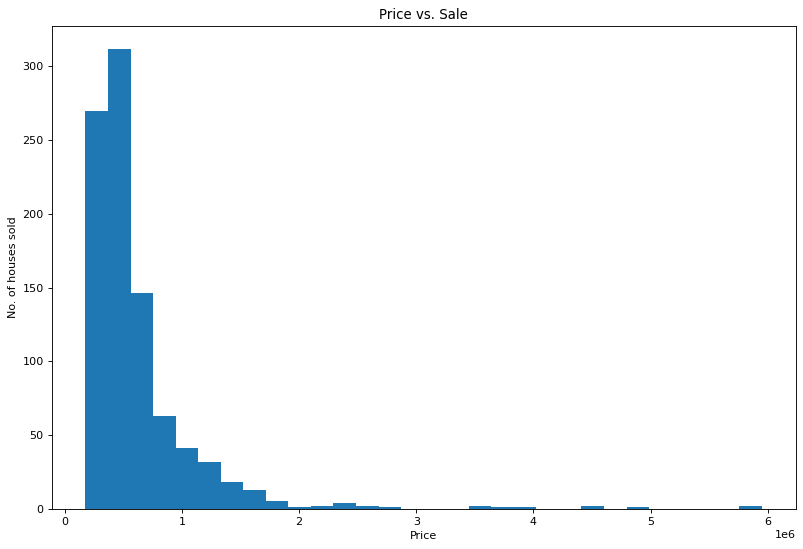

In [51]:
plt.figure(figsize=(12, 8), dpi=80)
df7.Price.plot(kind="hist",bins=30)
plt.xlabel("Price")
plt.ylabel("No. of houses sold")
plt.title("Price vs. Sale")

Above histogram shows that the house price of budget around 500000 EUR are in the highest demand.